In [187]:
from astropy.io import fits
import numpy as np
import matplotlib.pyplot as plt
from fit_spectra import fit_element, gaussian
from constants import EmissionLines

In [188]:
file = 'manga-12491-12704-LOGCUBE.fits'

with fits.open(file) as cube:
    flux = cube['FLUX'].data
    wave = cube['WAVE'].data

In [189]:
element_list = {
    EmissionLines.O_II[0]: {'name': 'O_II', 'popt': None, 'window_centre': 3847, },
    EmissionLines.H_GAMMA[0]: {'name': 'H_GAMMA', 'popt': None, 'window_centre': 4478, },
    EmissionLines.H_BETA[0]: {'name': 'H_BETA', 'popt': None, 'window_centre': 5015},
    EmissionLines.O_III[0]: {'name': 'O_III', 'popt': None, 'window_centre': 5117},
    EmissionLines.O_III[1]: {'name': 'O_III', 'popt': None, 'window_centre': 5167},
    EmissionLines.HE_I[0]: {'name': 'HE_I', 'popt': None, 'window_centre': 6062},
    EmissionLines.O_I[0]: {'name': 'O_I', 'popt': None, 'window_centre': 6500},
    EmissionLines.S_III[0]: {'name': 'S_III', 'popt': None, 'window_centre': 6512},
    EmissionLines.N_II[0]: {'name': 'N_II', 'popt': None, 'window_centre': 6755},
    EmissionLines.H_ALPHA[0]: {'name': 'H_ALPHA', 'popt': None, 'window_centre': 6772},
    EmissionLines.N_II[1]: {'name': 'N_II', 'popt': None, 'window_centre': 6792},
    EmissionLines.S_II[0]: {'name': 'S_II', 'popt': None, 'window_centre': 6930},
    EmissionLines.S_II[1]: {'name': 'S_II', 'popt': None, 'window_centre': 6945},
    EmissionLines.S_III[1]: {'name': 'S_III', 'popt': None, 'window_centre': 9358},
    EmissionLines.S_III[2]: {'name': 'S_III', 'popt': None, 'window_centre': 9835}
}

spectra = {
    'H_ALPHA': {'bands': [], 'combined': None, 'label': r'H$\alpha$'},
    'H_BETA': {'bands': [], 'combined': None, 'label': r'H$\beta$'},
    'H_GAMMA': {'bands': [], 'combined': None, 'label': r'H$\gamma$'},
    'HE_I': {'bands': [], 'combined': None, 'label': r'He I'},
    'O_I': {'bands': [], 'combined': None, 'label': r'O I'},
    'O_II': {'bands': [], 'combined': None, 'label': r'O II'},
    'O_III': {'bands': [], 'combined': None, 'label': r'O III'},
    'N_II': {'bands': [], 'combined': None, 'label': r'N II'},
    'S_II': {'bands': [], 'combined': None, 'label': r'S II'},
    'S_III': {'bands': [], 'combined': None, 'label': r'S III'}
}

wavelengths = np.arange(3600, 10000, 1)

for lambda_rest in element_list:
    window_centre = element_list[lambda_rest]['window_centre']
    name = element_list[lambda_rest]['name']

    *_, popt = fit_element(37, 37, flux, wave, lambda_rest=lambda_rest, window_centre=window_centre, ws=10, threshold=0.08)

    element_list[lambda_rest]['popt'] = popt
    spectra[name]['bands'].append(gaussian(wavelengths, *popt))



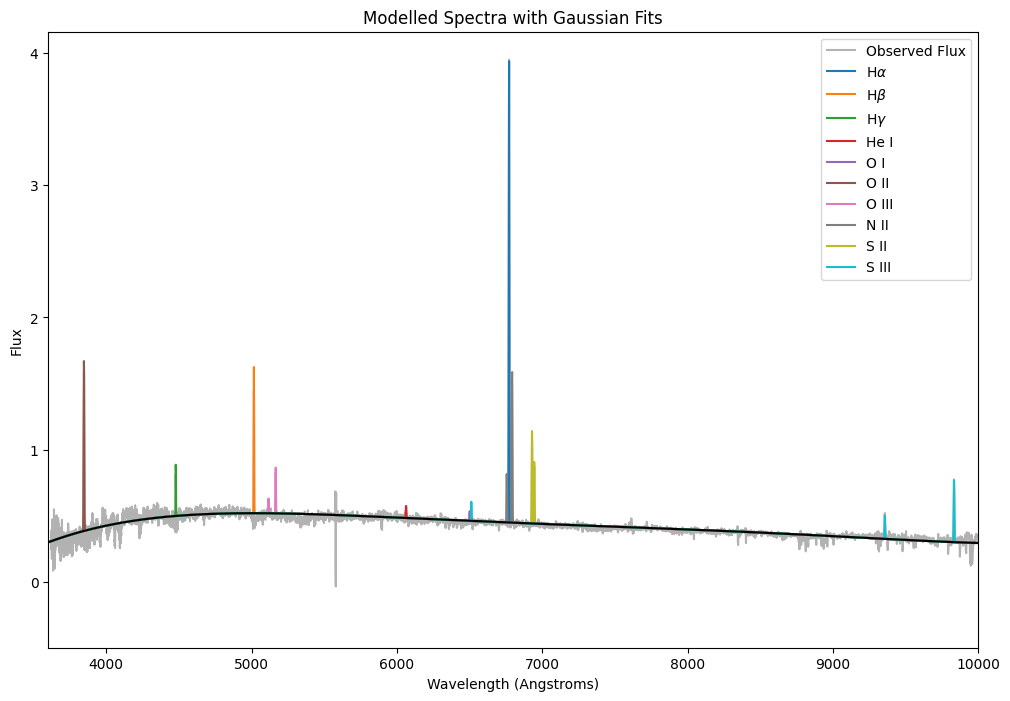

In [190]:
plt.figure(figsize=(12, 8))

plt.plot(wave, flux[:, 37, 37], label='Observed Flux', color='black', alpha=0.3)

flux_poly = np.polyfit(wave, flux[:, 37, 37], 5)
flux_fit = np.polyval(flux_poly, wavelengths)

for name, data in spectra.items():
    grounded = [band - np.min(band) for band in data['bands']]
    data['combined'] = np.sum(grounded, axis=0)
    data['combined'] += flux_fit
    plt.plot(wavelengths, data['combined'], label=data['label'])

plt.plot(wavelengths, flux_fit, color='black')

plt.title("Modelled Spectra with Gaussian Fits")
plt.xlabel('Wavelength (Angstroms)')
plt.ylabel('Flux')
plt.xlim(3600, 10000)
plt.legend()